In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import os

In [2]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    'data3/train',  # Path to training data directory
    target_size=(192, 192),
    batch_size=16,
    class_mode='categorical')

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    'data3/test',  # Path to testing data directory
    target_size=(192, 192),
    batch_size=16,
    class_mode='categorical')

Found 38569 images belonging to 7 classes.
Found 938 images belonging to 7 classes.


In [3]:
path = 'data3/train/'
class_names = sorted(os.listdir(path))
num_classes = len(class_names)

img_size = (192, 192, 3)

print('classes: ', class_names)

classes:  ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [8]:
cnn_model = tf.keras.Sequential()

# Inputs and rescaling
cnn_model.add(tf.keras.layers.Rescaling(scale=1. / 255, input_shape=(img_size)))

# Convolutional block 1
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 2
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 3
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 4
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
cnn_model.add(tf.keras.layers.Flatten())

# Dense block
cnn_model.add(tf.keras.layers.Dense(256, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


cnn_model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 192, 192, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 192, 192, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 192, 192, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 96, 96, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 128)       32896     
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 128)       65664     
                                                        

In [9]:
history = cnn_model.fit(train_generator, epochs=50, validation_data=test_generator)

Epoch 1/50
2411/2411 [==============================] - 245s 99ms/step - loss: 1.5347 - accuracy: 0.3638 - val_loss: 0.7555 - val_accuracy: 0.7292
Epoch 2/50
2411/2411 [==============================] - 229s 95ms/step - loss: 1.1962 - accuracy: 0.5257 - val_loss: 0.7207 - val_accuracy: 0.7239
Epoch 3/50
2411/2411 [==============================] - 231s 96ms/step - loss: 1.0349 - accuracy: 0.5942 - val_loss: 0.5727 - val_accuracy: 0.7878
Epoch 4/50
2411/2411 [==============================] - 231s 96ms/step - loss: 0.9225 - accuracy: 0.6381 - val_loss: 0.5643 - val_accuracy: 0.7921
Epoch 5/50
2411/2411 [==============================] - 231s 96ms/step - loss: 0.8379 - accuracy: 0.6736 - val_loss: 0.4844 - val_accuracy: 0.8273
Epoch 6/50
2411/2411 [==============================] - 231s 96ms/step - loss: 0.7694 - accuracy: 0.7014 - val_loss: 0.4455 - val_accuracy: 0.8348
Epoch 7/50
2411/2411 [==============================] - 230s 95ms/step - loss: 0.7214 - accuracy: 0.7186 - val_loss: 0

In [10]:
loss, accuracy = cnn_model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

59/59 [==============================] - 3s 58ms/step - loss: 0.6883 - accuracy: 0.8625
Test Loss: 0.6882966160774231
Test Accuracy: 0.8624733686447144


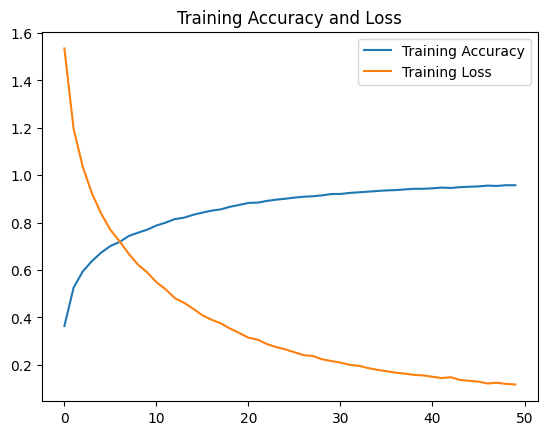

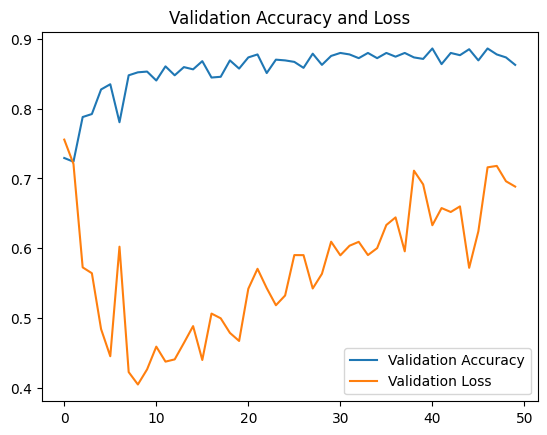

In [14]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, loss, label='Training Loss')
plt.legend()
plt.title('Training Accuracy and Loss')

plt.figure()
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Validation Accuracy and Loss')

plt.show()

In [13]:
cnn_model.save('skin_disease_cnn_model_newv2.keras')
print("Model đã được lưu thành công.")

Model đã được lưu thành công.


In [20]:
new_image_path = 'data3\\test\\bkl\\ISIC_0024383.jpg'
# Định nghĩa các thông số
img_width, img_height = 192, 192


def load_and_preprocess_image(img_path, img_width, img_height):
    img = load_img(img_path, target_size=(img_width, img_height))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Tải và xử lý ảnh mới
image_array = load_and_preprocess_image(new_image_path, img_width, img_height)
predictions = cnn_model.predict(image_array)

# In ra kết quả dự đoán
predicted_class = np.argmax(predictions[0])
print(predictions)
print(predicted_class)
predicted_label = class_names[predicted_class]
print(f'Dự đoán bệnh: {predicted_label}')


1/1 [==============================] - 0s 15ms/step
[[6.03111472e-09 3.25385986e-12 9.97367918e-01 3.82831719e-14
  1.17926288e-06 2.63095135e-03 1.00267855e-14]]
2
Dự đoán bệnh: bkl
